In [ ]:
# 用于计算和探索新功能，没有任何其他特殊用途

In [160]:
2 ** 2 ** 2 ** 2

65536

In [29]:
import pandas as pd
import numpy as np
import pickle
import time 
import os
from datetime import datetime
from operator import itemgetter
import time

# 需要什么读取什么不要一次性全都读取了，影响程序速度

data_folder_path = '../'
raw_data_path = "../raw_data"
storage_path = "../database_storage"
daily_path = "../daily"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
DCBS_path = os.path.join(storage_path, "DCBS.pkl")

time1 = time.time()

with open('database_ByZCG\\DCBS_DataFrame.pkl', 'rb') as f:  
    DCBS_DataFrame = pickle.load(f)
    

with open('database_ByZCG\\DTBS_DataFrame.pkl', 'rb') as f:  
    DTBS_DataFrame = pickle.load(f)

# 只提取A区中存活的转债的时间序列信息
A_DF = DTBS_DataFrame['A']
A_DF = A_DF[A_DF['ia']==1].copy()
# 提取B区信息
B_DF = DTBS_DataFrame['B']
# 提取C区信息
C_DF = DTBS_DataFrame['C']
# 提取D区信息
D_DF = DTBS_DataFrame['D']

In [30]:
# DataFrame新增列用于存放前一天收盘价、涨跌幅
A_DF.sort_values(by = ['bond_code','date'], inplace=True, ascending=[True,True])
A_DF['lastday_dp'] = A_DF.groupby('bond_code')['dp'].shift(1)
A_DF['change'] = A_DF['dp'] / A_DF['lastday_dp'] - 1
A_DF = pd.merge(A_DF, B_DF[['bond_code', 'sn', 'cn', 'sc']].drop_duplicates(), on='bond_code', how='left')

In [34]:
from WindPy import w
import datetime

# 需要获取的日期
need_date = '2023-09-08'
A_DF_one_day = A_DF[A_DF['date']==need_date].copy()

stock_code_list = list(set(A_DF_one_day['sc']))
print(stock_code_list)
w.start()

# 获取年化波动率
volatilityratio = w.wsd(stock_code_list, "volatilityratio", need_date, need_date, "CalculationTime=252;AnnualCoefficient=252").Data[0]
print(volatilityratio)

mapping = dict(zip(stock_code_list, volatilityratio))
print(mapping)

A_DF_one_day['volatilityratio'] = A_DF_one_day['sc'].apply(lambda x : mapping[x])
A_DF_one_day

['300740.SZ', '603912.SH', '002548.SZ', '300966.SZ', '300452.SZ', '002815.SZ', '688595.SH', '601633.SH', '002036.SZ', '605166.SH', '603320.SH', '300265.SZ', '002406.SZ', '000552.SZ', '600939.SH', '600745.SH', '002287.SZ', '300196.SZ', '300826.SZ', '605488.SH', '301040.SZ', '300879.SZ', '603982.SH', '603058.SH', '600481.SH', '603377.SH', '600810.SH', '002891.SZ', '300428.SZ', '603920.SH', '301186.SZ', '600577.SH', '300246.SZ', '605138.SH', '603817.SH', '301078.SZ', '300296.SZ', '002969.SZ', '688059.SH', '600909.SH', '688323.SH', '601963.SH', '603278.SH', '300850.SZ', '300556.SZ', '601020.SH', '300121.SZ', '300790.SZ', '002877.SZ', '002436.SZ', '603810.SH', '600885.SH', '000589.SZ', '002838.SZ', '002850.SZ', '300498.SZ', '000783.SZ', '301098.SZ', '000761.SZ', '300529.SZ', '002562.SZ', '603486.SH', '600029.SH', '300424.SZ', '300776.SZ', '300967.SZ', '603638.SH', '600903.SH', '002851.SZ', '300587.SZ', '301085.SZ', '002100.SZ', '601838.SH', '002787.SZ', '688680.SH', '603876.SH', '600141.SH'

,bond_code,date,cpr,dp,bl,trt,ytm,yl,dl,ia,...,xx15,xx30,hs,redeem_count,lastday_dp,change,sn,cn,sc,volatilityratio
9465,110043.SH,2023-09-08,8.17,109.966,29.210,0.86,-9.14,0.395,118.136,1,...,0.0,0.0,0.0,0/15 | 30,110.279,-0.002838,无锡银行,无锡转债,600908.SH,22.121144
10713,110044.SH,2023-09-08,134.26,191.671,0.706,7.49,-54.38,0.803,325.931,1,...,15.0,29.0,0.0,0/15 | 30,192.869,-0.006211,广电网络,广电转债,600831.SH,34.299759
11956,110045.SH,2023-09-08,6.90,125.656,29.495,1.89,-16.60,0.847,132.556,1,...,0.0,0.0,0.0,0/15 | 30,125.790,-0.001065,海澜之家,海澜转债,600398.SH,31.151281
13415,110047.SH,2023-09-08,26.88,113.500,22.455,1.29,1.11,1.206,140.380,1,...,0.0,0.0,0.0,0/15 | 30,114.026,-0.004613,山鹰国际,山鹰转债,600567.SH,18.406399
14556,110048.SH,2023-09-08,14.44,169.710,12.760,4.26,-29.24,1.249,184.150,1,...,0.0,0.0,0.0,本次（2023年7月10日至2023年7月28日）不提前赎回，至2024年1月28日均不提前赎回,169.933,-0.001312,福能股份,福能转债,600483.SH,41.162947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393885,128138.SZ,2023-09-08,167.70,117.818,4.199,0.72,4.59,3.195,285.518,1,...,15.0,30.0,0.0,0/15 | 30,117.836,-0.000153,侨银股份,侨银转债,002973.SZ,28.689814
395568,128141.SZ,2023-09-08,19.83,123.070,12.701,1.06,-2.28,3.277,142.900,1,...,0.0,0.0,0.0,0/15 | 30,123.611,-0.004377,旺能环境,旺能转债,002034.SZ,21.504218
396210,128142.SZ,2023-09-08,48.50,118.770,7.180,1.41,-1.19,3.280,167.270,1,...,8.0,13.0,0.0,0/15 | 30,119.600,-0.006940,新乳业,新乳转债,002946.SZ,36.789241
396844,128143.SZ,2023-09-08,36.86,125.920,2.437,5.63,-1.34,3.337,162.780,1,...,6.0,18.0,0.0,0/15 | 30,124.566,0.010870,锋龙股份,锋龙转债,002931.SZ,36.637586


In [36]:
import math

# 设置步长为1天
dt = 1
sigma = 22.1211 * 0.01

# 10年期国债
r = 2.6654 * 0.01

# 上涨比例
u = math.exp(sigma / math.sqrt(252 / dt))

# 下跌比例
d = 1 / u

# 上涨的概率
p = (math.exp(r * dt / 252) - d) / (u - d)
print(u,d,p)

# 计算未来股价走势

1.0140325276179152 0.9861616592804184 0.5003115075506397


可转换债券价格: 5394.041976263849


In [5]:
import pandas as pd

# 创建一个时间序列数据
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = {'value': range(365)}
df = pd.DataFrame(data, index=date_rng)

print(df)

# 将数据按周进行重新采样，计算每周的平均值
weekly_resampled = df.resample('W').mean()

# 将数据按月进行重新采样，计算每月的总和
monthly_resampled = df.resample('M').sum()

monthly_resampled

            value
2022-01-01      0
2022-01-02      1
2022-01-03      2
2022-01-04      3
2022-01-05      4
...           ...
2022-12-27    360
2022-12-28    361
2022-12-29    362
2022-12-30    363
2022-12-31    364

[365 rows x 1 columns]


,value
2022-01-31,465
2022-02-28,1246
2022-03-31,2294
2022-04-30,3135
2022-05-31,4185
2022-06-30,4965
2022-07-31,6076
2022-08-31,7037
2022-09-30,7725
2022-10-31,8928


In [12]:
import pandas as pd

# 创建一个示例的 DataFrame
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'D']}
df = pd.DataFrame(data)

# 统计 'Category' 列中不同元素的数量
unique_count = df['Category'].nunique()

print("不同元素的数量:", unique_count)

不同元素的数量: 4


,issue_price,listing_date,ipo_board,exchange
wind_code,,,,
301371.SZ,55.68,2023-08-01,创业板,深圳
603119.SH,15.32,2023-08-01,主板,上海
688646.SH,46.80,2023-07-28,科创板,上海
688651.SH,39.90,2023-07-26,科创板,上海
688612.SH,47.29,2023-07-26,科创板,上海
...,...,...,...,...
603173.SH,18.65,2023-01-30,主板,上海
688485.SH,17.47,2023-01-18,科创板,上海
834950.BJ,13.00,2023-01-11,北证,


创业板



,issue_price,listing_date,ipo_board,exchange
wind_code,,,,
301371.SZ,55.68,2023-08-01,创业板,深圳
301519.SZ,20.93,2023-07-27,创业板,深圳
301446.SZ,31.89,2023-07-25,创业板,深圳
301512.SZ,39.66,2023-07-20,创业板,深圳
301172.SZ,31.33,2023-07-26,创业板,深圳
...,...,...,...,...
301419.SZ,24.80,2023-02-09,创业板,深圳
301358.SZ,23.77,2023-02-09,创业板,深圳
301373.SZ,33.73,2023-02-08,创业板,深圳


科创板



,issue_price,listing_date,ipo_board,exchange
wind_code,,,,
688646.SH,46.80,2023-07-28,科创板,上海
688651.SH,39.90,2023-07-26,科创板,上海
688612.SH,47.29,2023-07-26,科创板,上海
688450.SH,53.09,2023-07-24,科创板,上海
688602.SH,8.66,2023-07-20,科创板,上海
688563.SH,78.99,2023-07-19,科创板,上海
688627.SH,46.77,2023-07-18,科创板,上海
688610.SH,73.33,2023-07-19,科创板,上海
688638.SH,83.90,2023-07-12,科创板,上海


沪主板



,issue_price,listing_date,ipo_board,exchange
wind_code,,,,
603119.SH,15.32,2023-08-01,主板,上海
603172.SH,14.58,2023-05-10,主板,上海
603137.SH,15.90,2023-04-19,主板,上海
601065.SH,10.36,2023-04-10,主板,上海
601133.SH,11.66,2023-04-10,主板,上海
603135.SH,17.80,2023-04-10,主板,上海
603125.SH,25.98,2023-04-10,主板,上海
601061.SH,6.58,2023-04-10,主板,上海
603282.SH,18.00,2023-03-15,主板,上海


深主板



,issue_price,listing_date,ipo_board,exchange
wind_code,,,,
001373.SZ,28.93,2023-06-01,主板,深圳
001282.SZ,27.93,2023-05-24,主板,深圳
001324.SZ,18.88,2023-05-22,主板,深圳
001380.SZ,28.84,2023-05-16,主板,深圳
001286.SZ,9.60,2023-04-10,主板,深圳
001360.SZ,15.38,2023-04-10,主板,深圳
001328.SZ,20.68,2023-04-10,主板,深圳
001367.SZ,44.48,2023-04-10,主板,深圳
001287.SZ,11.88,2023-04-10,主板,深圳


北交所



,issue_price,listing_date,ipo_board,exchange
wind_code,,,,
832982.BJ,49.00,2023-07-20,北证,
833751.BJ,5.80,2023-07-17,北证,
838701.BJ,8.80,2023-07-19,北证,
873576.BJ,9.35,2023-07-12,北证,
837592.BJ,10.38,2023-07-10,北证,
836717.BJ,5.07,2023-07-03,北证,
832175.BJ,12.60,2023-06-30,北证,
832651.BJ,12.88,2023-06-27,北证,
833455.BJ,3.15,2023-06-21,北证,


最高卖出价格时点： 13:11:00


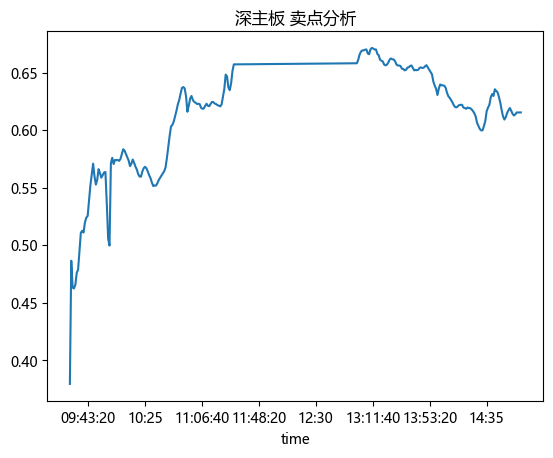

最高卖出价格时点： 13:40:00


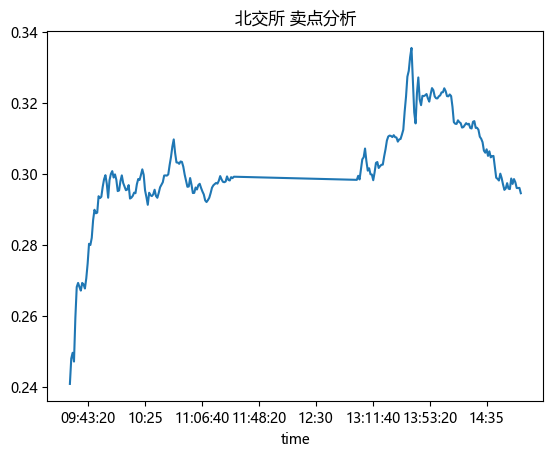

In [154]:
# 给左哥写的东西，不要动，暂时先留着

import pandas as pd
from WindPy import w
import numpy as np
import matplotlib.pyplot as plt
import os

# 解决中文乱码问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

w.start()

# 统计开始日期
start_date = '2023-01-01'
end_date = '2023-08-01'


# 获取期间内所有的IPO数据
all_data = w.wset(
    "newstockissueinfo",
    "startdate={};enddate={};datetype=listing;board=all;field=wind_code,issue_price,listing_date,ipo_board,exchange".format(start_date, end_date),
    usedf=True)[1]

all_data.set_index('wind_code',inplace=True)
all_data.sort_values('listing_date')
display(all_data)

# 获取分板块数据
cyb_data = all_data[all_data['ipo_board']=='创业板'].copy()
kcb_data = all_data[all_data['ipo_board']=='科创板'].copy()
hzb_data = all_data[(all_data['ipo_board']=='主板') & (all_data['exchange']=='上海')].copy()
szb_data = all_data[(all_data['ipo_board']=='主板') & (all_data['exchange']=='深圳')].copy()
bjs_data = all_data[all_data['ipo_board']=='北证'].copy()

# 看看导的东西对不对
print('创业板\n')
display(cyb_data)
print('科创板\n')
display(kcb_data)
print('沪主板\n')
display(hzb_data)
print('深主板\n')
display(szb_data)
print('北交所\n')
display(bjs_data)



def analyze(publish_data, board):
    # 记录上市日价格
    first_day_price = pd.DataFrame()
    for secu in publish_data.index:
        publish_date = publish_data.loc[secu, 'listing_date']
        data = w.wsi(secu,
                     "open",
                     str(publish_date + pd.Timedelta('9:00:00')),
                     str(publish_date + pd.Timedelta('15:00:00')),
                     "Fill=Previous", usedf=True)
        if data[0] == 0:
            data = data[1]['open']
            data.index = data.index.time
            first_day_price[secu] = data
        else:
            print('{} error:{}'.format(secu, data[1]))

    # 计算每分钟相对发行价收益率
    first_day_return = first_day_price / publish_data['issue_price'] - 1

    # 计算平均收益率
    ave_return = first_day_return.mean(axis=1)
    
    print("最高卖出价格时点：",ave_return.idxmax())
    
    # 画图
    ave_return.plot()
    # 添加标题
    plt.title(board+' 卖点分析')
    plt.show()
    
    # 定义要保存的文件夹路径和文件名
    folder_path = '卖点分析'  # 修改为要保存的文件夹路径
    file_name = board + '卖点分析.xlsx'

    # 确保文件夹存在，如果不存在则创建
    os.makedirs(folder_path, exist_ok=True)

    # 生成完整的文件路径
    file_path = os.path.join(folder_path, file_name)
    
    ave_return.to_excel(file_path)

    
    
# 都封装好了，你需要看哪个就输出那个的结果，不看的就注释掉，默认都输出
analyze(cyb_data, '科创板')
analyze(kcb_data, '创业板')
analyze(hzb_data, '沪主板')
analyze(szb_data, '深主板')
analyze(bjs_data, '北交所')